#The Titanic Project

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, you are to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Titanic Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Lets Visualize our dataset

<ipython-input-5-819361f6b1db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


([<matplotlib.axis.XTick at 0x7d0b9357d2d0>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

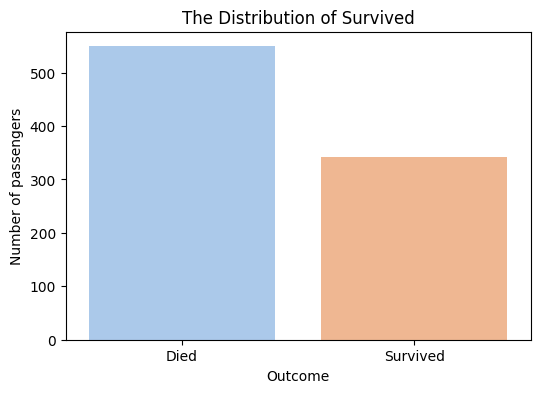

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('The Distribution of Survived')
plt.xlabel('Outcome')
plt.ylabel('Number of passengers')
plt.xticks([0,1], ['Died', 'Survived'])


In [ ]:
male_data = df[df['Sex']=='male']
male_died = len(male_data[male_data['Survived']==0])
male_survived = len(male_data[male_data['Survived']==1])

Text(0, 0.5, 'Number of Males')

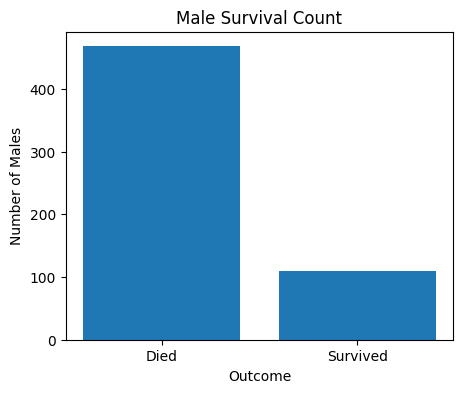

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(['Died', 'Survived'], [male_died, male_survived])
plt.title('Male Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Males')

In [ ]:
female_data=df[df['Sex']=='female']
female_died=len(female_data[female_data['Survived']==0])
female_survived=len(female_data[female_data['Survived']==1])

Text(0, 0.5, 'Number of Females')

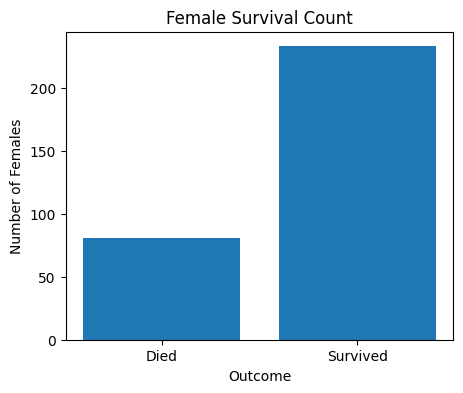

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(['Died', 'Survived'], [female_died, female_survived])
plt.title('Female Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Females')

In [ ]:
df=df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-12-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df=pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,28.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


In [ ]:
x=df.drop(columns=['Survived'])

In [ ]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,True
1,1,38.0,1,0,71.2833,False
2,3,26.0,0,0,7.9250,False
3,1,35.0,1,0,53.1000,False
4,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True
887,1,19.0,0,0,30.0000,False
888,3,28.0,1,2,23.4500,False
889,1,26.0,0,0,30.0000,True


In [ ]:
y=df['Survived']

In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[-1.10982656e+00, -3.42737626e-02, -2.88588193e-01,
        -3.73178052e-02, -6.90298549e-04, -2.68826599e+00]])

**Feature Importance**

We will only get the columns that are important

In [ ]:
df_impt =pd.DataFrame({'Features':x.columns, 'Coefficient':model.coef_[0]}).sort_values(by='Coefficient', key=abs, ascending=False)

In [ ]:
df_impt

,Features,Coefficient
5,Sex_male,-2.688266
0,Pclass,-1.109827
2,SibSp,-0.288588
3,Parch,-0.037318
1,Age,-0.034274
4,Fare,-0.000690


<ipython-input-30-1ebb2d2c8dd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Features', data=df_impt, palette='coolwarm')


Text(0.5, 1.0, 'Feature Importance')

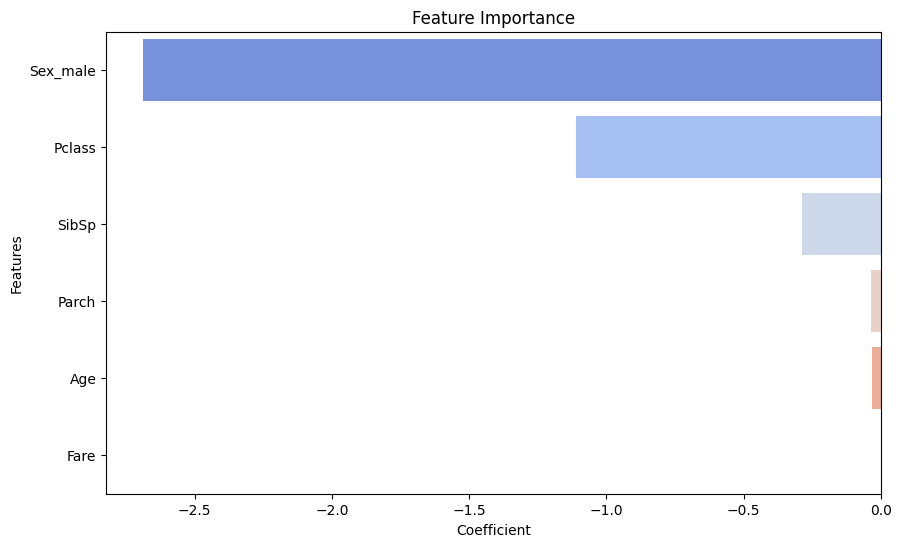

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Features', data=df_impt, palette='coolwarm')
plt.title('Feature Importance')
